# Real-world Data Wrangling

### Introduction

In this project, I will work with two datasets related to Movies and TV Shows from Netflix and Amazon Prime. The purpose of this project is to analyze and compare the content available on these two platforms and uncover insights about trends, genres, and other key characteristics.

The datasets used in this project are:
1. **Netflix Dataset**: This dataset was retrieved programmatically from Kaggle using the Kaggle API.
2. **Amazon Prime Dataset**: This dataset was downloaded manually from a trusted source.

The project will focus on answering the following research question:
- *What are the differences in content between Netflix and Amazon Prime in terms of genres, release years, and ratings?*

To complete this project, the following steps will be performed:
1. **Data Gathering**: Retrieve and load the datasets into the environment.
2. **Data Assessment**: Inspect the data for quality and structure issues.
3. **Data Cleaning**: Address missing values, duplicates, and other inconsistencies.
4. **Data Storage**: Store the cleaned data in a database for easy access and analysis.
5. **Data Analysis**: Combine the datasets and perform exploratory data analysis (EDA) to extract insights.
6. **Visualization and Insights**: Use visualizations to clearly present the findings.
7. **Conclusion**: Summarize the key insights and observations.

This project will utilize Python libraries such as:
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `matplotlib` and `seaborn` for visualizations, and
- `sqlite3` for database storage.

Through this project, I aim to apply data analysis techniques to real-world datasets and derive meaningful insights about popular streaming platforms.


Before starting the data analysis, I need to install the necessary packages and Library for this project.

## Importing and installing required libraries and packages.

In [976]:
!python -m pip install kaggle==1.6.12

In [977]:
import matplotlib
import pandas as pd
import numpy as np
import kaggle  # For accessing datasets via Kaggle API
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Gather Data

In this section, I will collect data using two distinct methods and merge the datasets together for further analysis. The data will be related to movies and TV shows from Netflix and Amazon Prime.


### 1.1 Problem Statement

In this project, I will evaluate, clean, merge, and save two datasets about movies and TV Shows from Netflix and Amazon Prime. The goal is to explore the data and answer interesting questions, such as comparing the variety and type of content offered on these two platforms.


### 1.2 Gather at Least Two Datasets Using Different Methods

#### Methods for Gathering Data:
1. **Manually Downloading Data**:  
   The Amazon Prime dataset was downloaded manually from a trusted source.
   
2. **Using the Kaggle API**:  
   The Netflix dataset was retrieved programmatically using the Kaggle API. This method ensures efficient and reproducible access to the dataset.

#### Requirements for Each Dataset:

- **Netflix Dataset**:
  - **Source**: Kaggle
  - **Key Variables**: Title, Genre, Release Year, Rating, Duration
  - **Importance**: This dataset provides insight into the variety and trends in Netflix's content offerings. The variables help analyze the type and quality of content available.
  - **Method**: Retrieved using the Kaggl
e
 API.

- **Amazon Prime Dataset**:
  - **Source**: Downloaded manually from a trusted source.
  - **Key Variables**: Title, Genre, Release Year, Rating, Duration
  - **Importance**: This dataset allows us to analyze Amazon Prime's content offerings in comparison to Netflix. The variables help assess diversity and quality.
  - **Method**: Downloaded manually from the source website.
te.



#### Dataset 1: Netflix Movies and TV Shows

- **Type**: CSV file  
- **Method**: This dataset was get using the Kaggle API.
- **Source**: https://www.kaggle.com/datasets/shivamb/netflix-shows

Dataset variables:

The dataset includes the following key columns:
1. **show_id**: A unique identifier assigned to each movie or TV show.
2. **type**: Specifies whether the entry is a movie or a TV show.
3. **title**: The title of the movie or TV show.
4. **director**: The name of the director associated with the movie or TV show.
5. **cast**: A list of actors and actresses featured in the production.
6. **country**: Indicates the country where the movie or TV show was produced.
7. **date_added**: The date when the content was added to Netflix.
8. **release_year**: The year the movie or TV show was originally released.
9. **rating**: A classification of the content based on viewer suitability.
10. **duration**: The runtime or number of episodes for the content.
11. **listed_in**: Categories or genres that describe the movie or TV show.
12. **description**: A brief overview or synopsis of the content.


In [980]:
# Define the folder and file paths
data_directory = "Project2_datasets"
expected_file_name = "netflix_titles.csv"  # based on the actual file name
csv_file_path = os.path.join(data_directory, expected_file_name)

# Check if the file exists before loading
if not os.path.exists(csv_file_path):
    print(f"File '{expected_file_name}' not found in '{data_directory}'. Re-downloading the dataset...")
    kaggle.api.dataset_download_files("shivamb/netflix-shows", path=data_directory, unzip=True)
    print("Dataset downloaded. Checking directory contents:")
    print(os.listdir(data_directory))  # List directory contents for debugging

# Try loading the dataset
try:
    netflix_data = pd.read_csv(csv_file_path)
    print(f"Dataset '{expected_file_name}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{expected_file_name}' was not found after downloading.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


Dataset 'netflix_titles.csv' loaded successfully!


#### Dataset 2: Amazon Prime Movies and TV Shows

- **Type**: CSV file  
- **Method**: This dataset was obtained by manual download.  
- **Source**: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

Dataset variables:

The dataset includes the following key columns:
1. **show_id**: A unique identifier assigned to each movie or TV show.
2. **type**: Specifies whether the entry is a movie or a TV show.
3. **title**: The title of the movie or TV show.
4. **director**: The name of the director associated with the movie or TV show.
5. **cast**: A list of actors and actresses featured in the production.
6. **country**: Indicates the country where the movie or TV show was produced.
7. **date_added**: The date when the content was added to Amazon Prime.
8. **release_year**: The year the movie or TV show was originally released.
9. **rating**: A classification of the content based on viewer suitability.
10. **duration**: The runtime or number of episodes for the content.
11. **listed_in**: Categories or genres that describe the movie or TV show.
12. **description**: A brief overview or synopsis of the content.


In [982]:
import os
import pandas as pd

# Define the folder and file paths
data_directory = "Project2_datasets"
file_name = "amazon_prime_titles.csv"  # Update this to the actual file name if different
csv_file_path = os.path.join(data_directory, file_name)

# Check if the file exists and load it
if os.path.exists(csv_file_path):
    amazon_data = pd.read_csv(csv_file_path)
    print(f"Dataset '{file_name}' loaded successfully!")
else:
    print(f"File '{file_name}' not found in the directory '{data_directory}'. Please verify the file location and name.")


Dataset 'amazon_prime_titles.csv' loaded successfully!


### 2. Assess Data
In this section, I identified two data quality issues and two tidiness issues in the Netflix and Amazon Prime datasets. The data was assessed both visually and programmatically to ensure its quality and structure meet the requirements for analysis. Key issues include missing values, incorrect data types, separate datasets, and multiple genres in a single column.


#### Quality Issue 1: Missing Values
- **Inspecting the dataframe visually**:


In [985]:
  netflix_data.head(10)  # Check for NaN values in key columns visually

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [986]:
amazon_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


In [987]:
print(netflix_data.isnull().sum())  # Count missing values in each column for Netflix

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


The Netflix dataset has missing values in key columns like `director`, `cast`, and `country`, which require cleaning to ensure accurate and complete analysis.

In [989]:
print(amazon_data.isnull().sum())  # Count missing values in each column for Amazon Prime

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


- **Issue and justification**:  
Some important columns, like `director`, `cast`, and `country`, have missing values in both datasets. This makes the data incomplete and can affect any analysis that depends on these columns, like finding trends related to directors, actors, or countries. Fixing these missing values is necessary to ensure the analysis is accurate.


#### Quality Issue 2: Incorrect Data Types

The `date_added` column is incorrectly stored as a string instead of a datetime object. This issue affects time-based analyses and must be corrected to enable reliable operations like filtering and sorting by date.

- **Inspecting the dataframe visually**:

In [993]:
netflix_data.info()  # Review data types visually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [994]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [995]:
print(netflix_data['date_added'].sample(5))  # Check the `date_added` column for format inconsistencies

2240      July 15, 2020
2822     March 13, 2020
778        June 2, 2021
7750    January 1, 2018
5018      March 1, 2018
Name: date_added, dtype: object


In [996]:
print(amazon_data['date_added'].sample(5))

6693    NaN
4729    NaN
1949    NaN
1071    NaN
7893    NaN
Name: date_added, dtype: object


- **Issue and justification**:  
The `date_added` column in both datasets is stored as text instead of a proper date format. This makes it difficult to analyze trends or filter by dates. The Netflix dataset has most `date_added` values filled, but the Amazon Prime dataset has many missing values. To fix this, we need to convert the column to a date format and handle the missing data in the Amazon Prime dataset.


#### Tidiness Issue 1: Separate Datasets

The Netflix and Amazon Prime datasets are stored as separate files, even though they share similar columns and serve a common purpose. Keeping these datasets separate complicates comparative analyses and requires additional steps to merge or compare content between the two platforms.

- **Inspecting the dataframe visually**:

In [1000]:
  print(netflix_data.columns)  # Check the columns in the Netflix dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [1001]:
  print(amazon_data.columns)  # Check the columns in the Amazon Prime dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [1002]:
netflix_columns = set(netflix_data.columns)
amazon_columns = set(amazon_data.columns)
print("Common columns:", netflix_columns & amazon_columns)

Common columns: {'director', 'rating', 'listed_in', 'duration', 'show_id', 'type', 'country', 'date_added', 'description', 'release_year', 'cast', 'title'}


In [1003]:
print("Unique columns (Netflix):", netflix_columns - amazon_columns)

Unique columns (Netflix): set()


In [1004]:
print("Unique columns (Amazon Prime):", amazon_columns - netflix_columns)

Unique columns (Amazon Prime): set()


- **Issue and justification**:  
The Netflix and Amazon Prime datasets share identical columns, making it possible to combine them into a single dataset. Adding a `platform` column to indicate the source will simplify comparative analysis and make the data easier to work with.


#### Tidiness Issue 2: Multiple Values in listed_in Column


The `listed_in` column in both datasets contains multiple genres/categories stored as a single string separated by commas. This format makes it difficult to analyze individual genres, such as finding the most popular genres or filtering content by a specific genre.

- **Inspecting the dataframe visually**:

In [1009]:
  print(netflix_data['listed_in'].head(5))  # Display sample values from Netflix dataset

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object


In [1010]:
  print(amazon_data['listed_in'].head(5))  # Display sample values from Amazon Prime dataset

0              Comedy, Drama
1       Drama, International
2    Action, Drama, Suspense
3                Documentary
4             Drama, Fantasy
Name: listed_in, dtype: object


In [1011]:
netflix_genres = netflix_data['listed_in'].str.split(', ')

In [1012]:
amazon_genres = amazon_data['listed_in'].str.split(', ')

In [1013]:
print(netflix_genres.sample(5))  # Check how genres are stored in Netflix

947                                   [Dramas, Thrillers]
2514    [British TV Shows, International TV Shows, Rea...
908          [TV Action & Adventure, TV Sci-Fi & Fantasy]
4003           [Action & Adventure, International Movies]
32      [British TV Shows, International TV Shows, TV ...
Name: listed_in, dtype: object


In [1014]:
print(amazon_genres.sample(5))  # Check how genres are stored in Amazon Prime

5919                      [Comedy, Drama, Romance]
2924                                        [Kids]
3127                                      [Horror]
2405               [Documentary, Special Interest]
39      [Faith and Spirituality, Special Interest]
Name: listed_in, dtype: object


- **Issue and justification**:  
The `listed_in` column in both datasets includes multiple genres in a single cell, separated by commas. This makes it hard to analyze individual genres, such as identifying the most popular genres or filtering content by a specific one. To fix this, the genres should be separated so each one can be analyzed on its own, making it easier to explore trends and patterns.


### 3. Clean Data

In this section, the data is cleaned to address the four issues identified in the assessment step. Cleaning decisions are justified, and the results are validated programmatically or visually.

#### Initial Step: Create Copies of the Data
To preserve the original datasets, copies are made before applying cleaning operations.

In [1018]:
netflix_cleaned = netflix_data.copy()
amazon_cleaned = amazon_data.copy()

#### **Quality Issue 1: Missing Values**

**Cleaning Strategy**:  
- Fill missing values in key columns (`director`, `cast`, and `country`) with "Unknown" or placeholders to avoid data loss.
- For columns with minimal missing values like `rating` and `duration`, drop rows with missing data since they make up a negligible proportion of the dataset.

In [1020]:
netflix_cleaned = netflix_cleaned.copy()  # Ensure it's a copy of the DataFrame
amazon_cleaned = amazon_cleaned.copy()
# Fill missing values with "Unknown"

netflix_cleaned['director'] = netflix_cleaned['director'].fillna("Unknown")
netflix_cleaned['cast'] = netflix_cleaned['cast'].fillna("Unknown")
netflix_cleaned['country'] = netflix_cleaned['country'].fillna("Unknown")

amazon_cleaned['director'] = amazon_cleaned['director'].fillna("Unknown")
amazon_cleaned['cast'] = amazon_cleaned['cast'].fillna("Unknown")
amazon_cleaned['country'] = amazon_cleaned['country'].fillna("Unknown")

In [1021]:
# Drop rows with missing values in `rating` and `duration`
netflix_cleaned.dropna(subset=['rating', 'duration'], inplace=True)
amazon_cleaned.dropna(subset=['rating'], inplace=True)  # Amazon Prime has no missing duration

In [1022]:
print(netflix_cleaned.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


In [1023]:
print(amazon_cleaned.isnull().sum())

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9191
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


### Justification:

Filling missing values in columns like `director`, `cast`, and `country` with "Unknown" ensures that no data is lost while keeping the dataset consistent. This approach allows us to still include these rows in the analysis, even if some information is missing. For columns with very few missing values like `rating` and `duration`, dropping those rows is a practical choice since it doesn’t significantly affect the overall dataset. This way, we maintain as much data as possible while ensuring it's clean and ready for analysis.


#### **Quality Issue 2: Incorrect Data Types**

The `date_added` column in both datasets is stored as a string instead of a proper datetime format. This makes it difficult to perform time-based analyses like filtering, sorting, or identifying trends over time. Converting this column to a datetime format will allow for efficient and accurate analysis.

**Cleaning Strategy**:  
Convert the `date_added` column in both datasets to a datetime format. Any invalid or missing values will be handled by converting them to `NaT` (Not a Timestamp), which is pandas' placeholder for missing datetime data.


In [1027]:
netflix_cleaned['date_added'] = pd.to_datetime(netflix_cleaned['date_added'], errors='coerce')
amazon_cleaned['date_added'] = pd.to_datetime(amazon_cleaned['date_added'], errors='coerce')

In [1028]:
print(netflix_cleaned['date_added'].dtype)

datetime64[ns]


In [1029]:
print(amazon_cleaned['date_added'].dtype)

datetime64[ns]


### Justification

Converting the `date_added` column to a proper datetime format is important for any analysis involving dates. It makes it easier to sort, filter, or analyze trends over time. Handling missing or invalid values as `NaT` ensures the data stays accurate without adding incorrect or made-up dates. This step improves the usability of the dataset for time-based analysis.

#### **Tidiness Issue 1: Separate Datasets**

The Netflix and Amazon Prime datasets are stored separately, even though they share the same structure and purpose. Keeping these datasets separate complicates comparative analysis and adds unnecessary steps for combining or comparing content between platforms. Combining them into one dataset simplifies the process and makes analysis more efficient.


**Cleaning Strategy**:  
Add a new column, `platform`, to each dataset to indicate the source (Netflix or Amazon Prime). Then, merge the two datasets into a single DataFrame using `pandas.concat()`.

In [1033]:
# Add a new column to indicate the platform
netflix_cleaned['platform'] = 'Netflix'
amazon_cleaned['platform'] = 'Amazon Prime'

In [1034]:
# Combine the datasets into one
combined_data = pd.concat([netflix_cleaned, amazon_cleaned], ignore_index=True)

In [1035]:
# Check the structure of the combined dataset
print(combined_data['platform'].value_counts())  # Verify platform column

platform
Amazon Prime    9331
Netflix         8800
Name: count, dtype: int64


In [1036]:
print(combined_data.shape)  # Confirm the total number of rows

(18131, 13)


### Justification

Combining the Netflix and Amazon Prime datasets into one makes it easier to analyze and compare content across the two platforms. Adding a `platform` column ensures we can still distinguish which content comes from each platform. This simplifies the analysis process and avoids unnecessary steps when working with the data.


#### **Tidiness Issue 2: Multiple Values in `listed_in` Column**

The `listed_in` column in both datasets contains multiple genres/categories stored as a single string separated by commas. This format makes it difficult to analyze individual genres, such as identifying the most popular genres or filtering content by a specific genre. Splitting this column into multiple rows ensures a more detailed and accurate analysis of genres.

**Cleaning Strategy**:  
Split the `listed_in` column into multiple rows for each genre using `pandas.explode()`. This creates a separate row for each genre while retaining all other associated data.

In [1040]:
# Split the 'listed_in' column into a list and then explode it into separate rows
combined_data['listed_in'] = combined_data['listed_in'].str.split(', ')
combined_data = combined_data.explode('listed_in')

In [1041]:
# Check the first few rows to confirm the change
print(combined_data[['title', 'listed_in']].head(10))  # Display the title and genre columns

                   title               listed_in
0   Dick Johnson Is Dead           Documentaries
1          Blood & Water  International TV Shows
1          Blood & Water               TV Dramas
1          Blood & Water            TV Mysteries
2              Ganglands          Crime TV Shows
2              Ganglands  International TV Shows
2              Ganglands   TV Action & Adventure
3  Jailbirds New Orleans              Docuseries
3  Jailbirds New Orleans              Reality TV
4           Kota Factory  International TV Shows


### Justification

Splitting the `listed_in` column into separate rows makes it much easier to analyze individual genres. By having one genre per row, we can accurately count, filter, or identify trends for specific genres across the datasets. This approach ensures the data is structured in a way that supports detailed and meaningful genre-based analysis.


### **Remove Unnecessary Variables and Combine Datasets**

After cleaning the datasets, unnecessary variables are removed, and the Netflix and Amazon Prime datasets are combined into one for easier analysis. This step ensures that the final dataset is concise and focused on the most relevant columns for analysis.

**Cleaning Strategy**:  
1. Remove columns that are not needed for the analysis, such as `description` and `show_id`, since they do not contribute directly to the research questions.
2. Retain key variables such as `title`, `type`, `listed_in`, `release_year`, and `platform` for further analysis.
3. Combine the cleaned Netflix and Amazon Prime datasets into a single DataFrame, as already done in **Tidiness Issue 1**.

In [1045]:
# Retain only the relevant columns
combined_data = combined_data[['title', 'type', 'listed_in', 'release_year', 'platform']]

In [1046]:
# Check the structure of the final dataset
print(combined_data.columns)  # Confirm selected columns

Index(['title', 'type', 'listed_in', 'release_year', 'platform'], dtype='object')


In [1047]:
print(combined_data['platform'].value_counts())  # Verify the row count for each platform

platform
Netflix         19314
Amazon Prime    17559
Name: count, dtype: int64


In [1048]:
print(combined_data.head())  # Display the first few rows

                  title     type               listed_in  release_year  \
0  Dick Johnson Is Dead    Movie           Documentaries          2020   
1         Blood & Water  TV Show  International TV Shows          2021   
1         Blood & Water  TV Show               TV Dramas          2021   
1         Blood & Water  TV Show            TV Mysteries          2021   
2             Ganglands  TV Show          Crime TV Shows          2021   

  platform  
0  Netflix  
1  Netflix  
1  Netflix  
1  Netflix  
2  Netflix  


### 4. Update Your Data Store

Both the raw and cleaned datasets are saved separately to ensure version control and traceability. Informative file names are used to clearly differentiate between raw and processed data.

**Saving Data**:  
The raw datasets are saved in their original state, and the cleaned combined dataset is saved after all transformations have been applied.

In [1051]:
# Save raw datasets
netflix_data.to_csv("raw_netflix_data.csv", index=False)
amazon_data.to_csv("raw_amazon_data.csv", index=False)

In [1052]:
# Save cleaned datasets
combined_data.to_csv("cleaned_combined_data.csv", index=False)

**Best Practices Followed**:

- Maintain separate files for raw and cleaned data to ensure reproducibility and traceability.
- Use clear and descriptive file names to easily differentiate between raw and processed datasets.
- Store data in a consistent format (CSV) for accessibility and compatibility with various tools.


### 5. Answer the Research Question

#### 5.1: Define and Answer the Research Question

**Research Question**:  
What are the differences in genre distribution between Netflix and Amazon Prime, and which platform has more content in each genre?

**# Visual 1**: Top 10 Genre Distribution by Platform  
This plot compares the top 10 most popular genres available on Netflix and Amazon Prime, showing how many movies and TV shows are available in each genre.

In [1056]:
# Ensure genres are split correctly (exploded into separate rows)
combined_data['listed_in'] = combined_data['listed_in'].str.split(', ')  # Split genres
combined_data = combined_data.explode('listed_in')  # Split into multiple rows

# Reset the index to avoid duplicate index issues
combined_data.reset_index(drop=True, inplace=True)

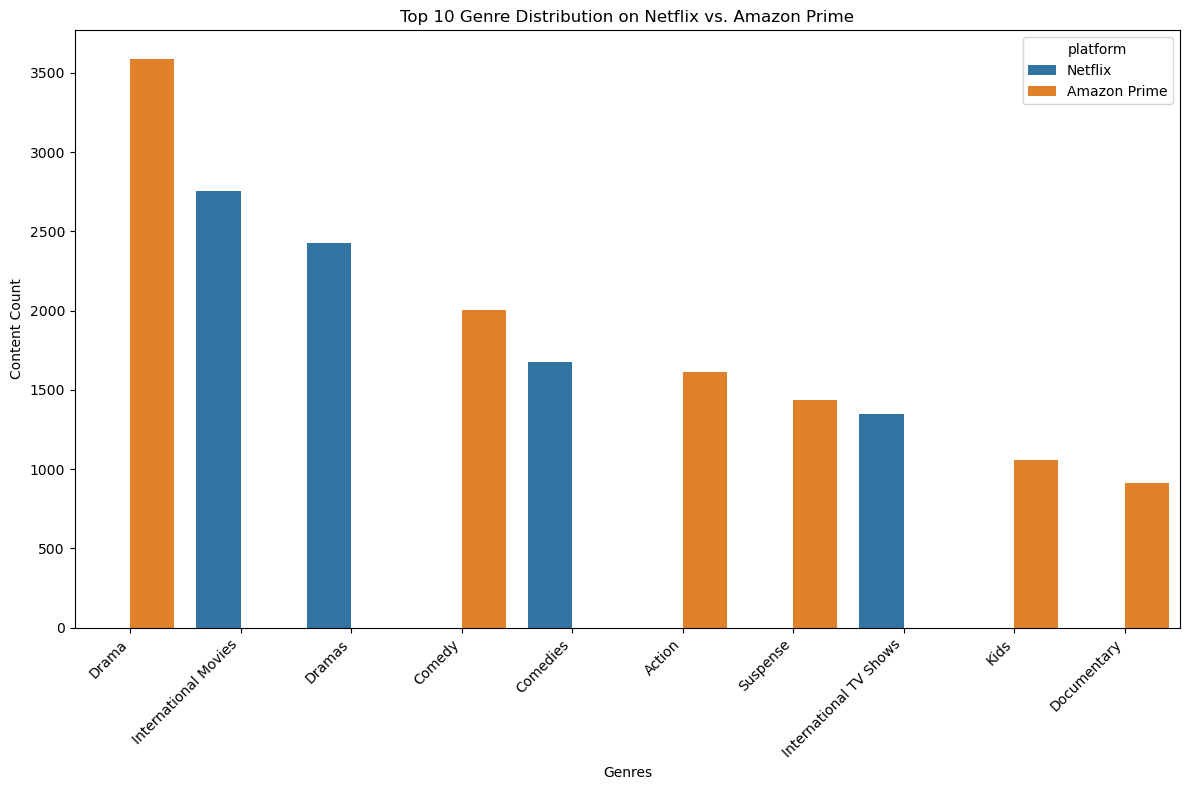

In [1057]:
# Create a countplot to compare the genre distribution on Netflix vs. Amazon Prime
plt.figure(figsize=(12,8))
sns.countplot(data=combined_data, x='listed_in', hue='platform', order=combined_data['listed_in'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Genre Distribution on Netflix vs. Amazon Prime')
plt.xlabel('Genres')
plt.ylabel('Content Count')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

*Answer to Research Question:* This plot clearly shows the top 10 genres on both platforms, allowing us to compare the genre distribution and identify which genres are most prevalent on Netflix and Amazon Prime.

**# Visual 2** : Genre Popularity on Each Platform
This visualization compares the most popular genres on Netflix and Amazon Prime by showing the content count for each platform, broken down by genre.

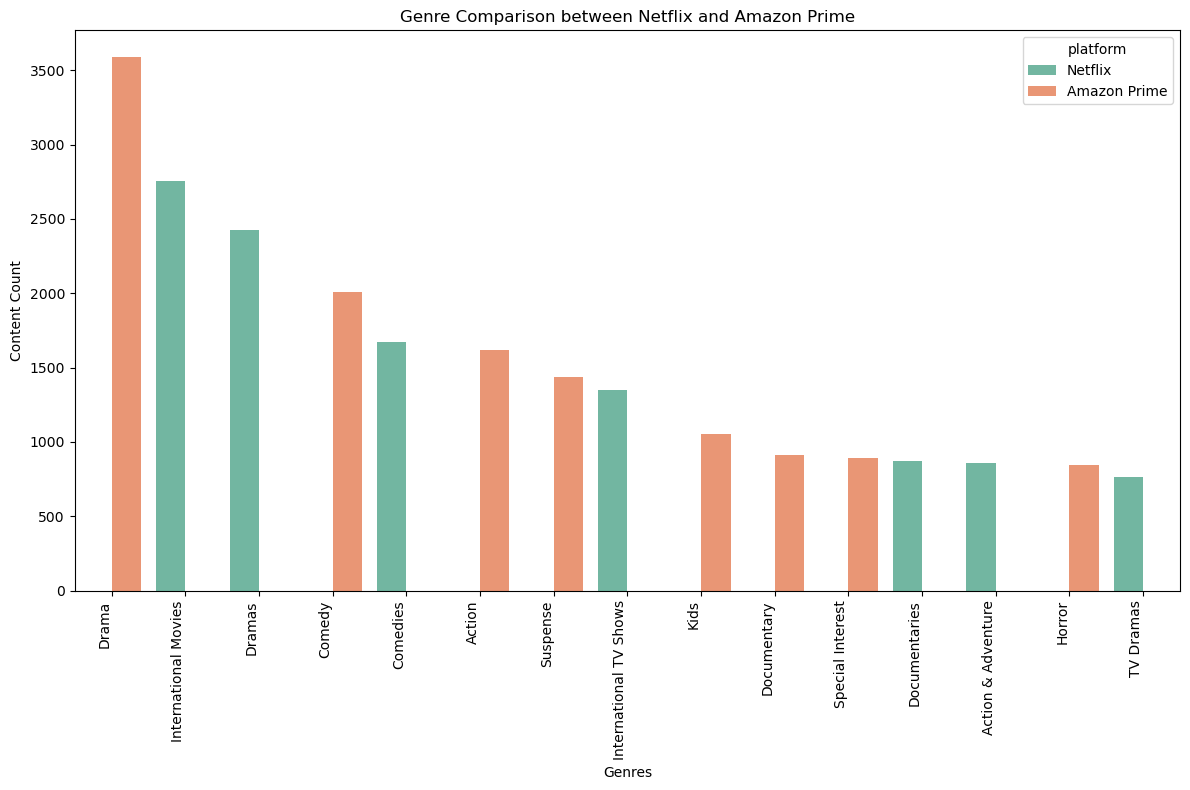

In [1060]:
plt.figure(figsize=(12,8))
sns.countplot(data=combined_data, x='listed_in', hue='platform', palette='Set2', order=combined_data['listed_in'].value_counts().index[:15])  # Top 15 genres
plt.xticks(rotation=90, ha='right')
plt.title('Genre Comparison between Netflix and Amazon Prime')
plt.xlabel('Genres')
plt.ylabel('Content Count')
plt.tight_layout()
plt.show()

*Answer to Research Question :* This bar plot gives a deeper view of the distribution of content in each genre, highlighting which platform offers more content for specific genres.

**# Visual 3**: Distribution of Content Type (Movies vs. TV Shows)  
This stacked bar plot compares the distribution of movies and TV shows available on Netflix and Amazon Prime. It helps us understand the proportion of content types (Movies vs. TV Shows) on each platform plot
plt.show()


<Figure size 800x600 with 0 Axes>

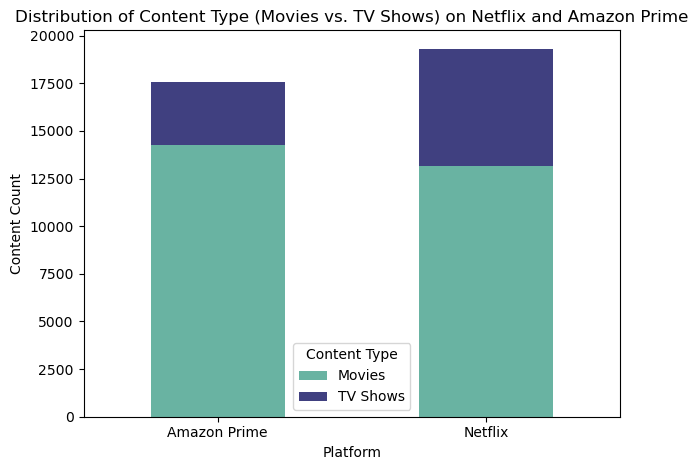

In [1063]:
# Count the number of movies and TV shows per platform
content_type_distribution = combined_data.groupby(['platform', 'type']).size().unstack().fillna(0)

# Plotting the distribution of content types (movies vs. TV shows) for each platform
plt.figure(figsize=(8,6))
content_type_distribution.plot(kind='bar', stacked=True, color=['#69b3a2', '#404080'])
plt.title('Distribution of Content Type (Movies vs. TV Shows) on Netflix and Amazon Prime')
plt.xlabel('Platform')
plt.ylabel('Content Count')
plt.xticks(rotation=0)
plt.legend(title='Content Type', labels=['Movies', 'TV Shows'])
plt.tight_layout()  # Adjust layout for better spacing
# Explicitly display the plot
plt.show()


*Answer to Research Question :* This plot shows the breakdown of Movies vs. TV Shows on both Netflix and Amazon Prime, highlighting which type of content is more prevalent on each platform.

**# Visual 4**: Release Year Distribution by Platform  
This visualization compares the release year distribution for Netflix and Amazon Prime content, helping us understand the evolution of content over time on each platform.

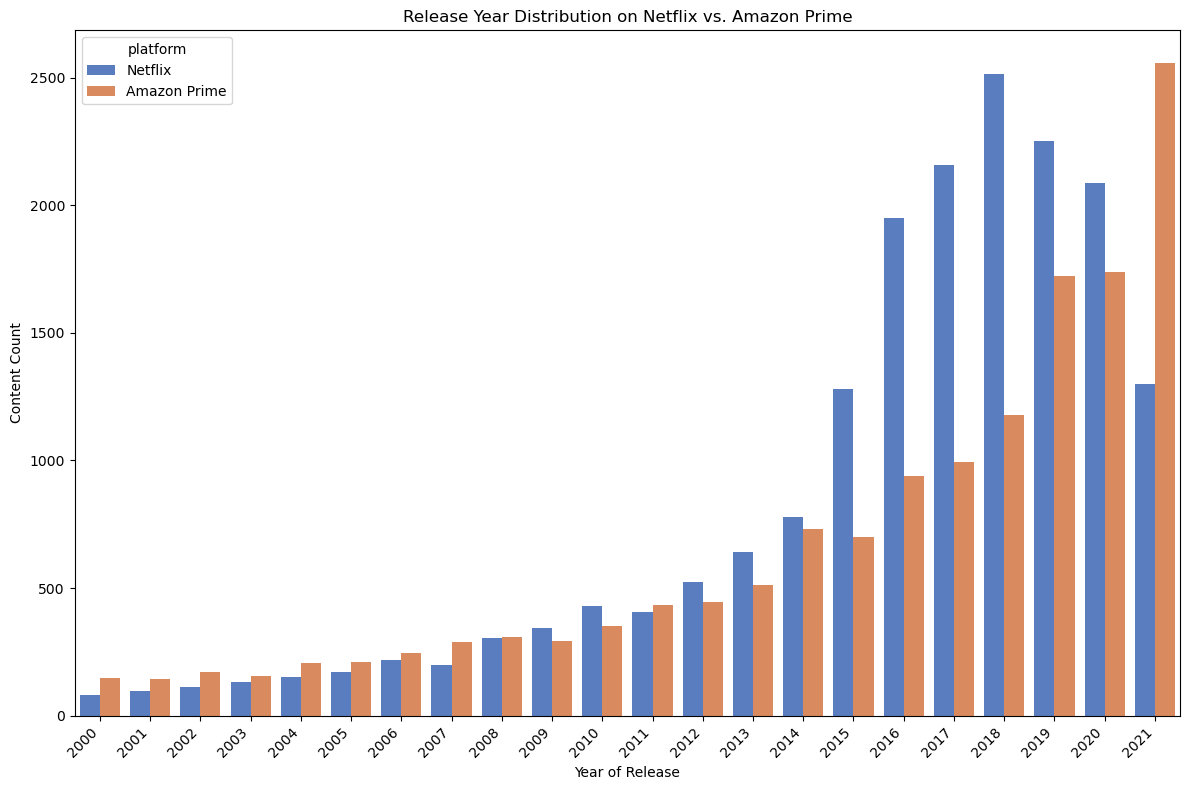

In [1066]:
plt.figure(figsize=(12,8))

sns.countplot(data=combined_data[combined_data['release_year'] >= 2000], x='release_year', hue='platform', palette='muted')

plt.title('Release Year Distribution on Netflix vs. Amazon Prime')
plt.xlabel('Year of Release')
plt.ylabel('Content Count')

# Improve x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


*Answer to Research Question :* This plot shows how the content libraries have grown over time on both platforms. It helps to identify trends in content releases, such as when platforms began to add more content or focused on specific genres.

### 5.2: Reflection

If I had more time to complete the project, I would focus on addressing missing data in columns like `director` and `cast`, as this could affect the accuracy of the analysis. I would also explore other research questions, such as the relationship between content type (movies vs. TV shows) and user ratings, or how the release year of content affects its popularity on each platform. There’s potential to dive deeper into these areas to get more insights from the data.
